In [26]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [27]:
#define the transmission curve

def Tsymthru(wavelength, neff, abscoef_power, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom
def dB2Frac(dB):
    return 10**(dB/10)

In [28]:
#extract the data

Vn2_T= np.loadtxt("../RT-Transmission-Data/-2V-RT-Data.csv", delimiter=",")
x = Vn2_T[:,0] 
y = Vn2_T[:,1]

In [29]:
#check for an weird points

print(y)

[0.99482535 0.99154717 0.98412831 0.97244324 0.96846634 0.95788571
 0.95119729 0.94397043 0.9358805  0.9223671  0.90354169 0.88478436
 0.86156825 0.83319049 0.80019589 0.76621635 0.73082883 0.69204484
 0.65641125 0.62162968 0.5787693  0.53472039 0.47975767 0.43915775
 0.37627879 0.30818314 0.24671752 0.18895114 0.14394004 0.09868812
 0.06257101 0.03850977 0.0352979  0.05723385 0.10046874 0.16156431
 0.2075673  0.27511692 0.33895198 0.3881884  0.43564287 0.48557117
 0.53724448 0.5846768  0.63358601 0.68650434 0.72620177 0.75719858
 0.78240507 0.80319384 0.82107169 0.8443875  0.85739356 0.87153034
 0.87701295 0.88339589]


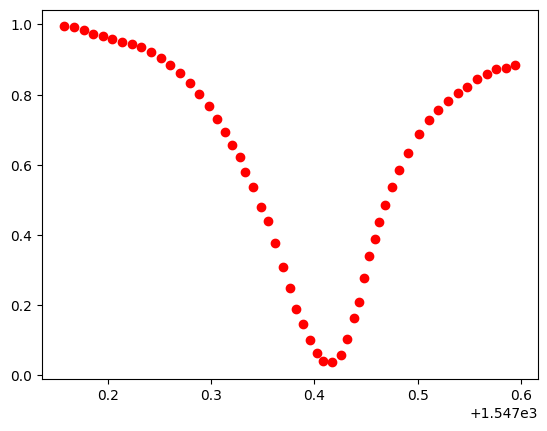

In [30]:
plt.plot(x, y, 'ro', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [31]:
#define the radius and r values

def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power, 0.987, 10e-6)

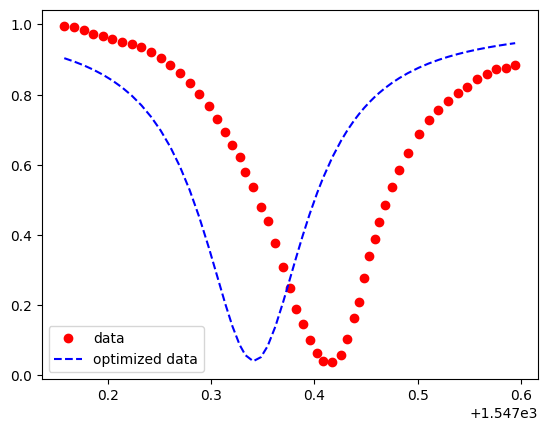

In [32]:
#plot a guess to make sure the neff value works
new_x = np.linspace(1540, 1550, 100)
ans = Guess(x*1e-9,2.16715, 280)

plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [33]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.16715, 280]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[  2.16724674 300.89280916]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674 300.89284112]
 [  2.16724674

In [34]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])

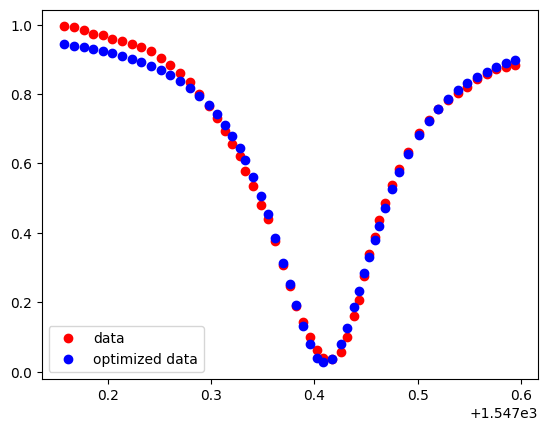

In [35]:
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, 'o', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()


[305.60371394   0.98734376]


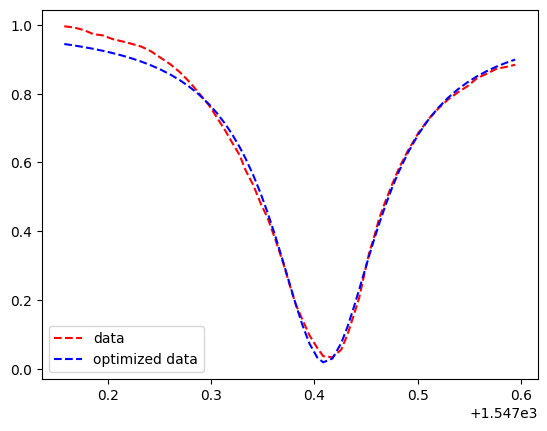

In [36]:
#lets try fitting the r and coeff values

def Guess2(wavelength, abscoef_power, r):
    return Tsymthru(wavelength, 2.16724673, abscoef_power, r, 10e-6)

fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[300, 0.987]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess2,x*1e-9,y,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr[10])

fit_ans = Guess2(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
plt.plot(x, y, '--', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()
